# Decomposed_Learning_Results (CL* Algorithm)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
realTestsDf =  pd.read_csv('Results/Parameters/Real-Tests/Results.csv',index_col=False)
p2pTestsDf = pd.read_csv('Results/Parameters/Generated-Tests/Point-To-Point/Results.csv', index_col=False)
ringTestsDf = pd.read_csv('Results/Parameters/Generated-Tests/Ring/Results.csv', index_col=False)
starTestsDf = pd.read_csv('Results/Parameters/Generated-Tests/Star/Results.csv', index_col=False)
meshTestsDf = pd.read_csv('Results/Parameters/Generated-Tests/Mesh/Results.csv', index_col=False)
busTestsDf = pd.read_csv('Results/Parameters/Generated-Tests/Bus/Results.csv', index_col=False)

## Clean data

In [3]:
def roundData(data):
  return round(data, 3)

In [4]:
def dropNas(data):
    data.dropna(axis=1, how='all')
    data.dropna()
    return(data)

In [5]:
realTestsDf = dropNas(realTestsDf)
p2pTestsDf = dropNas(p2pTestsDf)
ringTestsDf = dropNas(ringTestsDf)
starTestsDf = dropNas(starTestsDf)
meshTestsDf = dropNas(meshTestsDf)
busTestsDf = dropNas(busTestsDf)

In [6]:
def selectTests(data, testType):
    print(testType + ":")
    
    for componentCounter in range(2, 10):
        currentSelected = data[data["CLSTAR_COMPONENTS"] == componentCounter]
        currentSelected = currentSelected[(currentSelected["STATES"] >= 100) & (currentSelected["STATES"] <= 30000)]
        if(len(currentSelected) < 20):
            print("\t For" + str(componentCounter) + " Components: " + str(len(currentSelected)))
        # else:
        #     currentSelected = currentSelected[:][0:20]
        if componentCounter == 2:
            selected = currentSelected
        else:
            selected = pd.concat([selected, currentSelected], ignore_index=True, sort=False)
    return selected


In [7]:
# print(realTestsDf.columns)
# print(type(realTestsDf["CLSTAR_COMPONENTS"][0]))
realTestsDf = selectTests(realTestsDf, "Real Tests")
p2pTestsDf = selectTests(p2pTestsDf, "P2P Tests")
ringTestsDf = selectTests(ringTestsDf, "Ring Tests")
starTestsDf = selectTests(starTestsDf, "Star Tests")
meshTestsDf = selectTests(meshTestsDf, "Mesh Tests")
busTestsDf = selectTests(busTestsDf, "Bus Tests")

Real Tests:
	 For2 Components: 0
P2P Tests:
	 For2 Components: 0
Ring Tests:
	 For2 Components: 0
Star Tests:
	 For2 Components: 0
Mesh Tests:
	 For2 Components: 0
	 For7 Components: 9
	 For8 Components: 0
	 For9 Components: 0
Bus Tests:
	 For2 Components: 0
	 For6 Components: 0
	 For7 Components: 0
	 For8 Components: 0
	 For9 Components: 0


In [8]:
# Calculate mean without outliers
from scipy import stats
def trimmed_mean(x):
  z = stats.zscore(x)
  d_z = x.loc[z<3,]
  return d_z.mean()

## Statistical Analysis

We cluster the benchmark into eight categories based on the FSM’s number of states to summerize the results and illusterate them.

In [9]:
# Data Distribution
def printDataInfo(data, testType):
    print("For " + testType + "Tests:")
    print("\tCount:  ",data['FILE_NAME'].unique().size)
    print("\tMin:    ",data.groupby('FILE_NAME').agg(min)['STATES'].min())
    print("\tMax:    ",data.groupby('FILE_NAME').agg(min)['STATES'].max())

    print("\tmean:   ", data.groupby('FILE_NAME').agg(min)['STATES'].mean())

    print("\tstd:    ", data.groupby('FILE_NAME').agg(min)['STATES'].std())

In [10]:
printDataInfo(realTestsDf, 'Real')
printDataInfo(p2pTestsDf, 'Point-To-Point')
printDataInfo(ringTestsDf, 'Ring')
printDataInfo(starTestsDf, 'Star')
printDataInfo(meshTestsDf, 'Mesh')
printDataInfo(busTestsDf, 'Bus')

For RealTests:
	Count:   221
	Min:     117
	Max:     29952
	mean:    4781.524886877828
	std:     7974.790849669271
For Point-To-PointTests:
	Count:   209
	Min:     100
	Max:     30000
	mean:    5036.77033492823
	std:     6976.497215574836
For RingTests:
	Count:   210
	Min:     100
	Max:     30000
	mean:    5352.571428571428
	std:     8004.3766895776125
For StarTests:
	Count:   70
	Min:     100
	Max:     30000
	mean:    5173.528571428571
	std:     7579.089947131388
For MeshTests:
	Count:   147
	Min:     120
	Max:     27000
	mean:    5387.469387755102
	std:     7385.508908654155
For BusTests:
	Count:   100
	Min:     150
	Max:     29160
	mean:    5147.31
	std:     7213.567936720134


C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\2789857924.py:5: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("\tMin:    ",data.groupby('FILE_NAME').agg(min)['STATES'].min())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\2789857924.py:6: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("\tMax:    ",data.groupby('FILE_NAME').agg(min)['STATES'].max())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\2789857924.py:8: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep

In [11]:
# calculate the progress 
def calculateProgress(data):
    data['CLSTAR_TOTAL_RST_progress'] = (1 - (data['CLSTAR_TOTAL_RST'] / data['CLSTAR_TOTAL_RST']))*100
    data['CLSTAR_TOTAL_SYM_progress'] = (1 - (data['CLSTAR_TOTAL_SYM'] / data['CLSTAR_TOTAL_SYM']))*100

    data['CLSTAR_MQ_SYM_progress'] = (1 - (data['CLSTAR_MQ_SYM'] / data['CLSTAR_MQ_SYM']))*100
    data['CLSTAR_MQ_RST_progress'] = (1 - (data['CLSTAR_MQ_RST'] / data['CLSTAR_MQ_RST']))*100
    data['CLSTAR_EQ_SYM_progress'] = (1 - (data['CLSTAR_EQ_SYM'] / data['CLSTAR_EQ_SYM']))*100
    data['CLSTAR_EQ_RST_progress'] = (1 - (data['CLSTAR_EQ_RST'] / data['CLSTAR_EQ_RST']))*100
    
    return(data)


In [12]:
realTestsDf = calculateProgress(realTestsDf)
p2pTestsDf = calculateProgress(p2pTestsDf)
ringTestsDf = calculateProgress(ringTestsDf)
starTestsDf = calculateProgress(starTestsDf)
meshTestsDf = calculateProgress(meshTestsDf)
busTestsDf = calculateProgress(busTestsDf)

# Plots

In [13]:
sns.set(rc={'figure.figsize':(15,6)})

In [14]:
def addTypeColumn(data, type):
    data["TYPE"] = type
    return data

In [15]:
realTestsDf = addTypeColumn(realTestsDf, "REAL")
p2pTestsDf = addTypeColumn(p2pTestsDf, "Point-To-Point")
ringTestsDf = addTypeColumn(ringTestsDf, "Ring")
starTestsDf = addTypeColumn(starTestsDf, "Star")
meshTestsDf = addTypeColumn(meshTestsDf, "Mesh")

In [16]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
def plotInputSymbols(data, testType):
    d2 = data[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM', 'TYPE']]

    d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']] 
    d2 = d2.set_index(['#states','#components'])

    d2 = d2[['L*',  'SCL*']].stack().reset_index()
    d2 = d2.rename(columns={"level_2": "method", 0: "Total Number Of Input Symbols"})




    g = sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["Total Number Of Input Symbols"],
                hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g']);
    g.fig.suptitle(testType, y=1.08)
    g.axes[0,0].set_xlim((-500,30500))
    plt.yscale('log')


In [17]:
# @title Fig.4: The effect of FSM size in terms of number of components and states on total number of input resets.
def plotResets(data, testType):
    d2 = data[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]

    d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']] 
    d2 = d2.set_index(['#states','#components'])

    d2 = d2[['L*',  'SCL*']].stack().reset_index()
    d2 = d2.rename(columns={"level_2": "method", 0: "Total Number Of Resets"})

    g = sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["Total Number Of Resets"],
                hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g']);
    g.fig.suptitle(testType, y=1.08)
    g.axes[0,0].set_xlim((-500,30500))
    plt.yscale('log')


C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\1433060060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\1433060060.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipyk

C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\1460725430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\1460725430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipyk

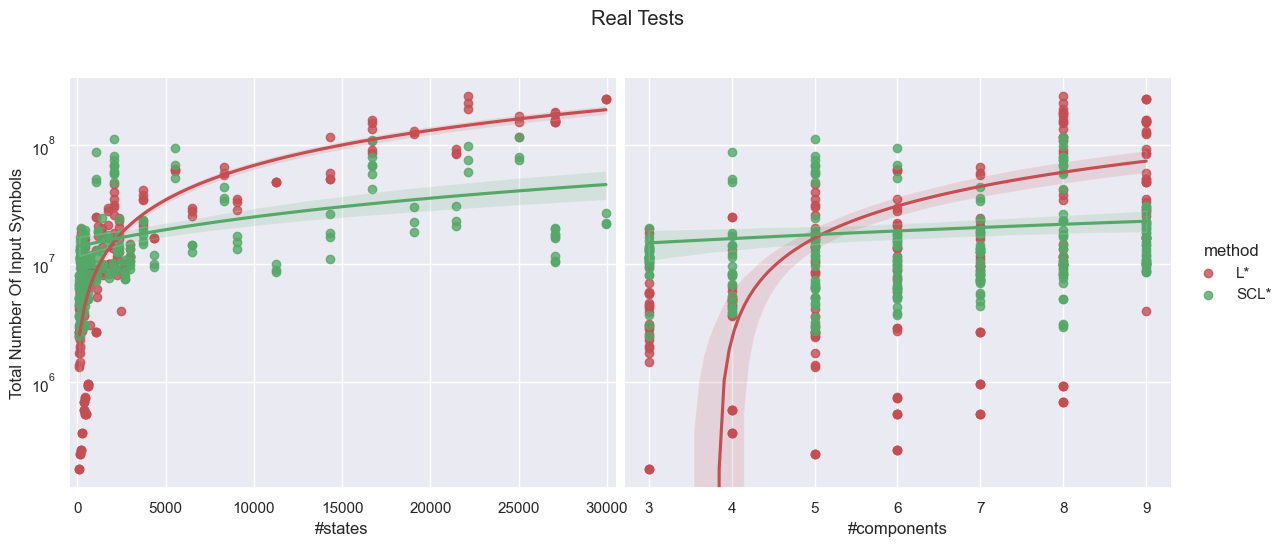

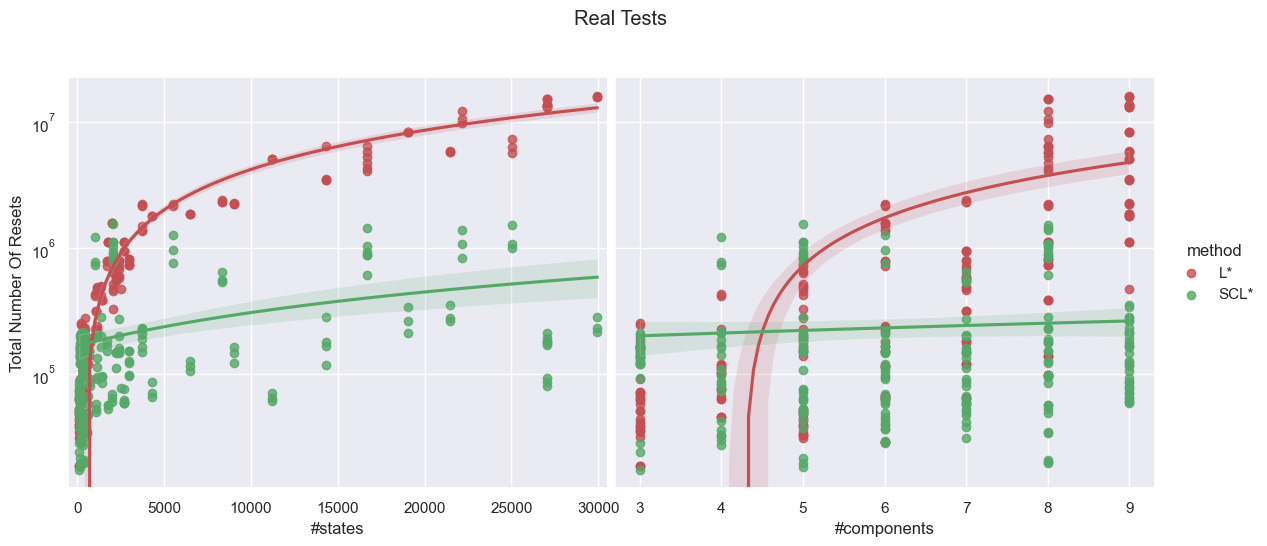

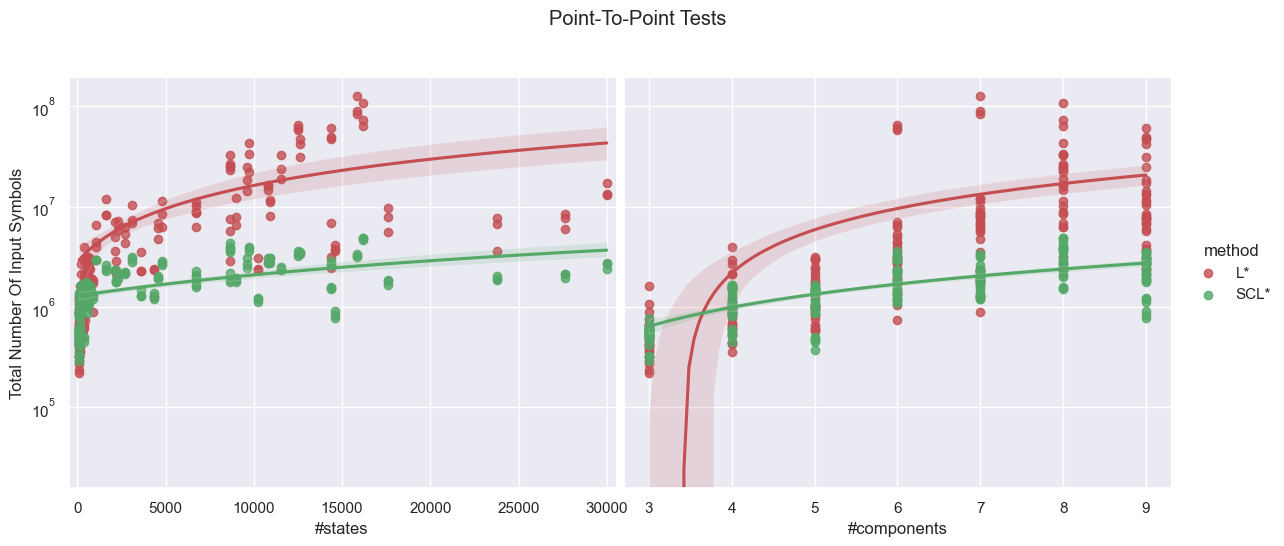

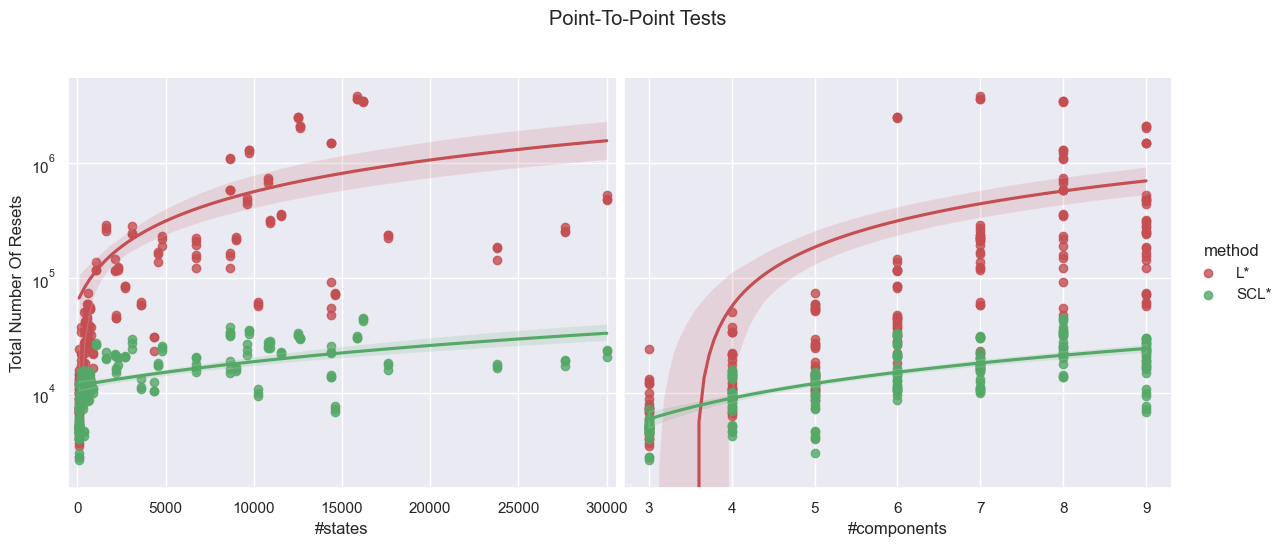

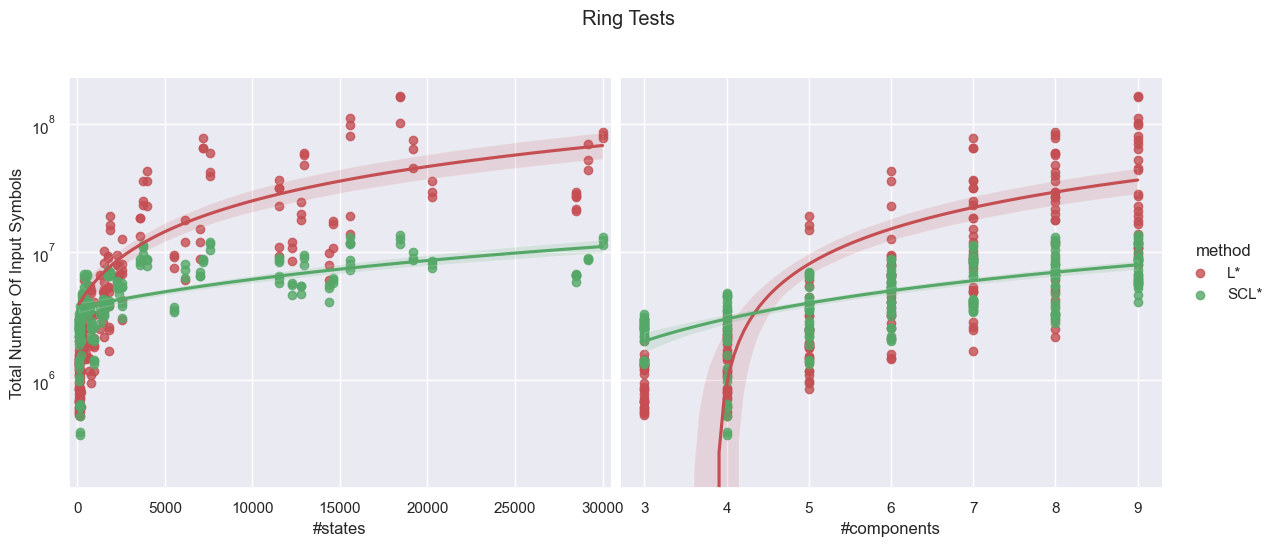

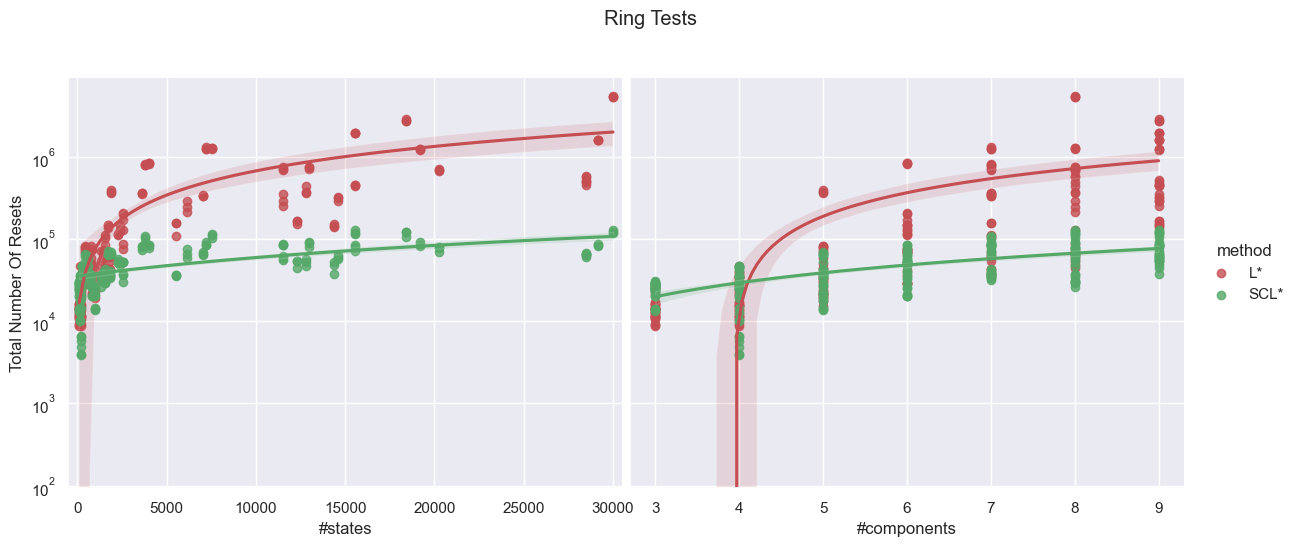

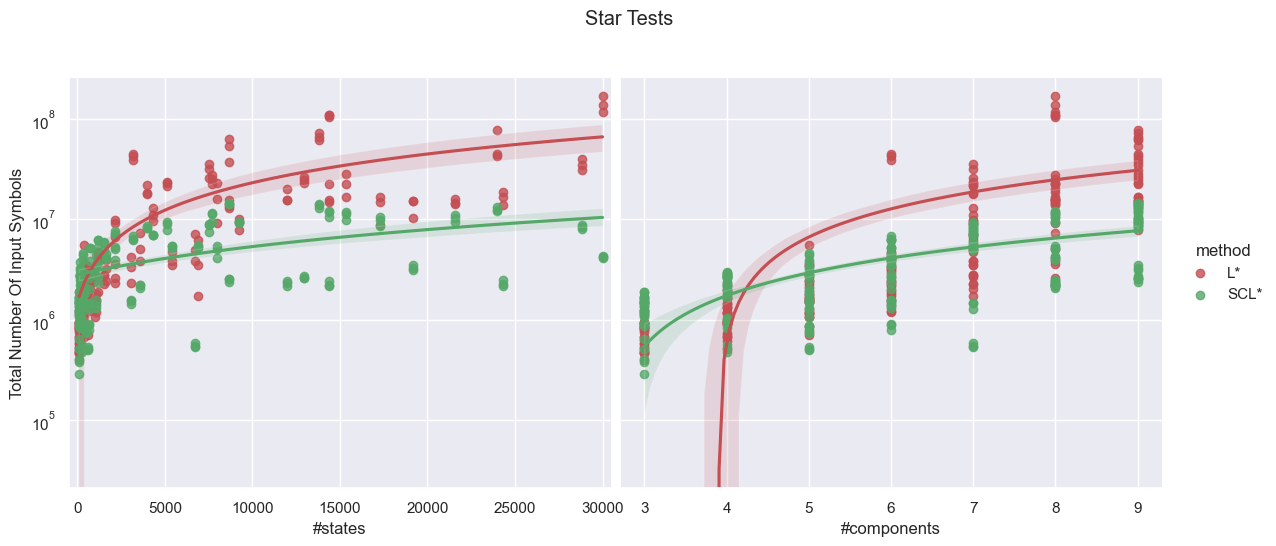

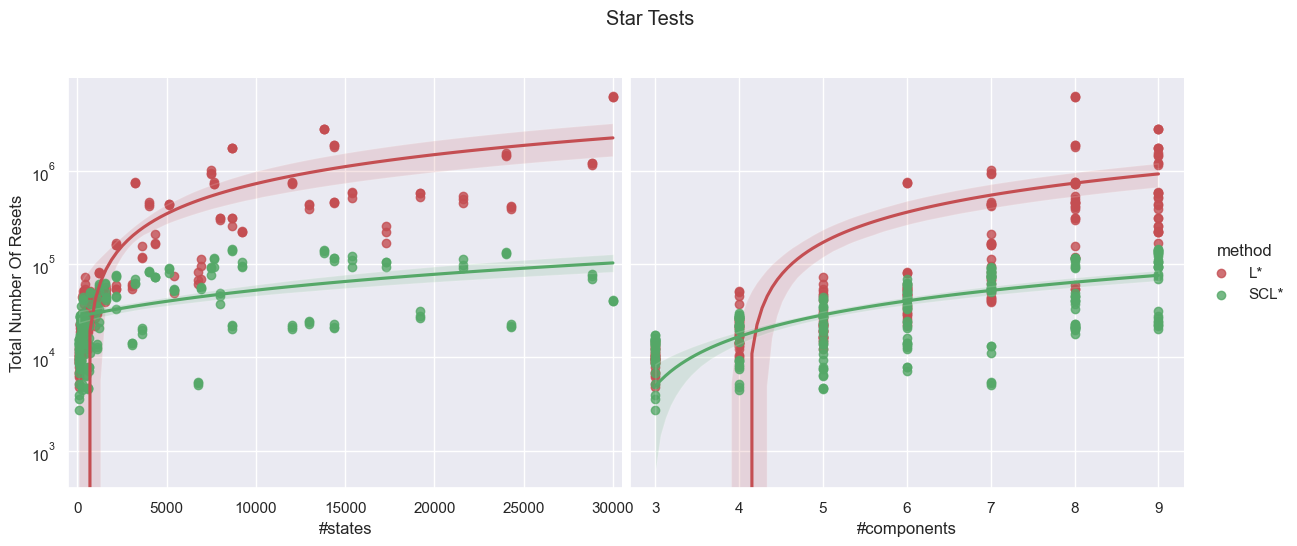

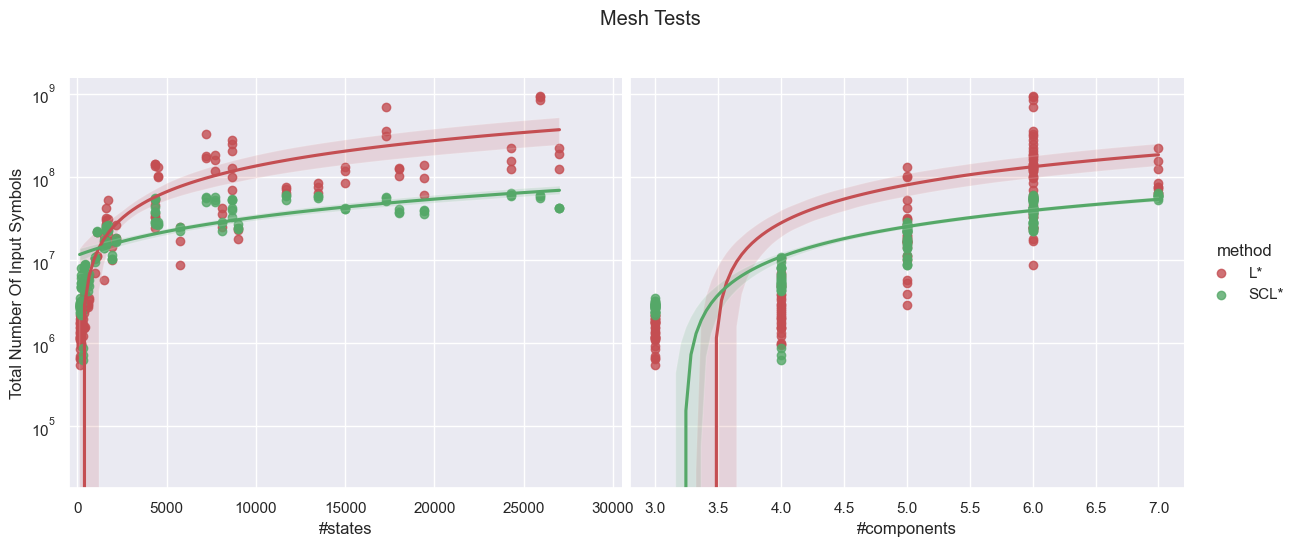

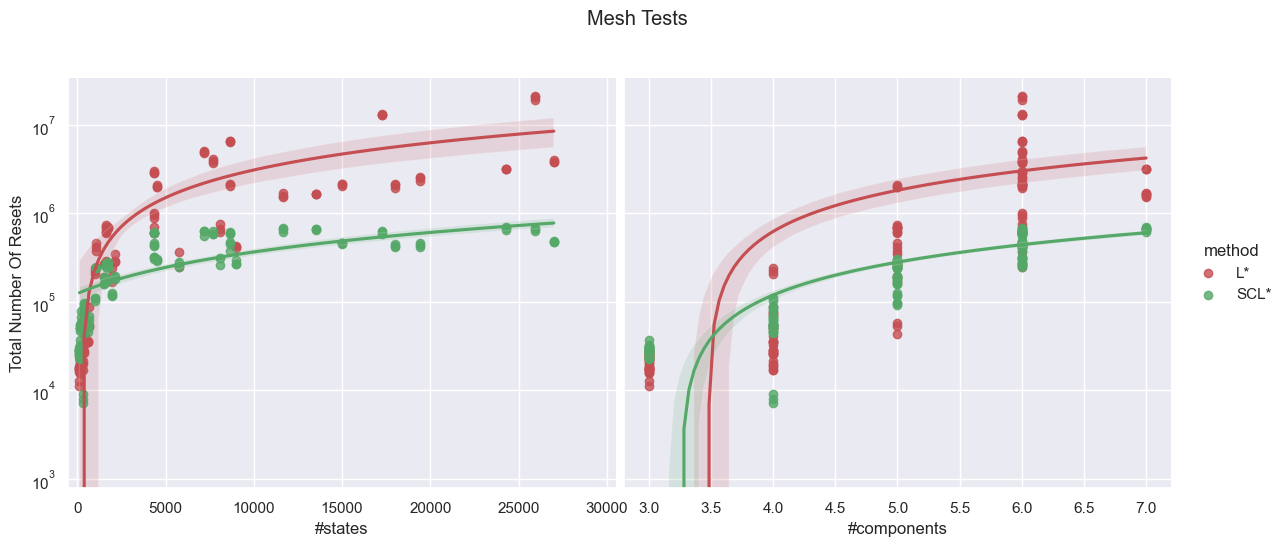

In [18]:
plotInputSymbols(realTestsDf, 'Real Tests')
plotResets(realTestsDf, 'Real Tests')

plotInputSymbols(p2pTestsDf, 'Point-To-Point Tests')
plotResets(p2pTestsDf, 'Point-To-Point Tests')

plotInputSymbols(ringTestsDf, 'Ring Tests')
plotResets(ringTestsDf, 'Ring Tests')

plotInputSymbols(starTestsDf, 'Star Tests')
plotResets(starTestsDf, 'Star Tests')

plotInputSymbols(meshTestsDf, 'Mesh Tests')
plotResets(meshTestsDf, 'Mesh Tests')

# plotInputSymbols(busTestsDf, 'Bus Tests')
# plotResets(busTestsDf, 'Bus Tests')

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# def plotMergedInputSymbols(p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf, testType):
#     f = plt.figure()    
#     f, axes = plt.subplots(ncols = 2, sharex=False, sharey = False)
    
#     axes[0].scatter(p2pTestsDf['STATES'], p2pTestsDf['LSTAR_TOTAL_RST'], marker = "o", color = "r")
#     axes[0].scatter(ringTestsDf['STATES'], ringTestsDf['LSTAR_TOTAL_RST'], marker = "x", color = "r")
#     axes[0].scatter(starTestsDf['STATES'], starTestsDf['LSTAR_TOTAL_RST'], marker = "*", color = "r")
#     axes[0].scatter(meshTestsDf['STATES'], meshTestsDf['LSTAR_TOTAL_RST'], marker = "s", color = "r")
    
#     axes[0].scatter(p2pTestsDf['STATES'], p2pTestsDf['CLSTAR_TOTAL_RST'], marker = "o", color = "g")
#     axes[0].scatter(ringTestsDf['STATES'], ringTestsDf['CLSTAR_TOTAL_RST'], marker = "x", color = "g")
#     axes[0].scatter(starTestsDf['STATES'], starTestsDf['CLSTAR_TOTAL_RST'], marker = "*", color = "g")
#     axes[0].scatter(meshTestsDf['STATES'], meshTestsDf['CLSTAR_TOTAL_RST'], marker = "s", color = "g")
    
#     axes[0].set_xlabel('States')
#     axes[0].set_xlim([100, 4000])
#     axes[0].sns.regplot(data=p2pTestsDf, x='STATES', y='CLSTAR_TOTAL_RST')
    
#     axes[1].scatter(p2pTestsDf['CLSTAR_COMPONENTS'], p2pTestsDf['LSTAR_TOTAL_RST'], marker = "o", color = "r")
#     axes[1].scatter(ringTestsDf['CLSTAR_COMPONENTS'], ringTestsDf['LSTAR_TOTAL_RST'], marker = "x", color = "r")
#     axes[1].scatter(starTestsDf['CLSTAR_COMPONENTS'], starTestsDf['LSTAR_TOTAL_RST'], marker = "*", color = "r")
#     axes[1].scatter(meshTestsDf['CLSTAR_COMPONENTS'], meshTestsDf['LSTAR_TOTAL_RST'], marker = "s", color = "r")
    
#     axes[1].scatter(p2pTestsDf['CLSTAR_COMPONENTS'], p2pTestsDf['CLSTAR_TOTAL_RST'], marker = "o", color = "g")
#     axes[1].scatter(ringTestsDf['CLSTAR_COMPONENTS'], ringTestsDf['CLSTAR_TOTAL_RST'], marker = "x", color = "g")
#     axes[1].scatter(starTestsDf['CLSTAR_COMPONENTS'], starTestsDf['CLSTAR_TOTAL_RST'], marker = "*", color = "g")
#     axes[1].scatter(meshTestsDf['CLSTAR_COMPONENTS'], meshTestsDf['CLSTAR_TOTAL_RST'], marker = "s", color = "g")
    
#     axes[1].set_xlabel('Components')
#     axes[1].set_xlim([2, 9])

    
#     plt.show()

In [20]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# def plotMergedInputSymbols2(p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf, testType):
#     mergedTests = pd.concat([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf], ignore_index=True, sort=False)
    
#     sns.set(style="whitegrid")  # Set Seaborn style
    
#     # Create a 1x2 grid of subplots
#     fig, axes = plt.subplots(ncols=2, figsize=(26, 13))
#     # Scatter plots for LSTAR_TOTAL_RST
#     for df, marker, color, label in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
#                                         ["v", "o", "*", "d"], ["Purple", "Pink", "Orange", "r"],
#                                         ["L*-P2P", "L*-Ring", "L*-Star", "L*-Mesh"]):
#         sns.regplot(data=df, x='STATES', y='LSTAR_TOTAL_SYM', marker=marker, color=color, ax=axes[0], label=label)
    
#     # Scatter plots for CLSTAR_TOTAL_RST
#     for df, marker, color, label in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
#                                         ["v", "o", "*", "d"], ["y", "gray", "b", "g"],
#                                         ["SCL*-P2P", "SCL*-Ring", "SCL*-Star", "SCL*-Mesh"]):
#         sns.regplot(data=df, x='STATES', y='CLSTAR_TOTAL_SYM', marker=marker, color=color, ax=axes[0], label=label)
        
    
#     axes[0].set_xlabel('States')
#     axes[0].set_xlim([50, 4050])
#     axes[0].set_ylim([300000, 100000000])
#     axes[0].set_yscale('log')
#     axes[0].set_ylabel('Total Number Of Symbols')
#     axes[0].legend(ncol = 2)
#     axes[0].set_title('Generated Tests')
    
#     # Scatter plots for LSTAR_TOTAL_RST vs. CLSTAR_COMPONENTS
#     for df, marker, color, label in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
#                                         ["v", "o", "*", "d"], ["Purple", "Pink", "Orange", "r"],
#                                         ["L*-P2P", "L*-Ring", "L*-Star", "L*-Mesh"]):
#         sns.regplot(data=df, x='CLSTAR_COMPONENTS', y='LSTAR_TOTAL_SYM', marker=marker, color=color, ax=axes[1], label=label)
    
#     # Scatter plots for CLSTAR_TOTAL_RST vs. CLSTAR_COMPONENTS
#     for df, marker, color, label in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
#                                         ["v", "o", "*", "d"], ["y", "gray", "b", "g"],
#                                         ["SCL*-P2P", "SCL*-Ring", "SCL*-Star", "SCL*-Mesh"]):
#         sns.regplot(data=df, x='CLSTAR_COMPONENTS', y='CLSTAR_TOTAL_SYM', marker=marker, color=color, ax=axes[1], label=label)
        
    
#     axes[1].legend(ncol = 2)
#     axes[1].set_xlabel('Components')
#     axes[1].set_xlim([2.9, 9.1])
#     axes[0].set_ylim([300000, 100000000])
#     axes[1].set_yscale('log')
#     axes[1].set_ylabel('Total Number Of Symbols')
#     axes[1].set_title('Generated Tests')

    
#     plt.yscale('log')
#     plt.tight_layout()  # Adjust subplot spacing
#     plt.show()


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plotMergedInputSymbols(p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf, testType):
    mergedTests = pd.concat([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf], ignore_index=True, sort=False)
    
    sns.set(style="whitegrid")  # Set Seaborn style
    
    # Create a 1x2 grid of subplots
    fig, axes = plt.subplots(ncols=2)
    
    # Scatter plots for LSTAR_TOTAL_RST
    for df, marker, color in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
                                 ["v", "o", "*", "d"], ["g", "b", "Orange", "r"]):
        sns.regplot(data=df, x='STATES', y='LSTAR_TOTAL_SYM', marker=marker, color=color,
                    ax=axes[0], line_kws={'linestyle': '--'})
    
    # Scatter plots for CLSTAR_TOTAL_RST
    for df, marker, color, label in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
                                        ["v", "o", "*", "d"], ["g", "b", "Orange", "r"],
                                        ["P2P", "Ring", "Star", "Mesh"]):
        sns.regplot(data=df, x='STATES', y='CLSTAR_TOTAL_SYM', marker=marker, color=color,
                    ax=axes[0], label=label)
        
    axes[0].set_xlabel('States')
    axes[0].set_xlim([50, 30500])
    axes[0].set_ylim(bottom=400000)
    axes[0].set_yscale('log')
    axes[0].set_ylabel('Total Number Of Symbols')
    axes[0].legend(loc='upper left', prop={"size": 20})
    axes[0].set_facecolor("#e4e6eb")
    axes[0].set_axisbelow(True)
    axes[0].yaxis.grid(color='white')
    axes[0].xaxis.grid(color='white')
    
    typeLegend = [
        plt.scatter([], [], marker='v', color='g', label='P2P'),
        plt.scatter([], [], marker='o', color='b', label='Ring'),
        plt.scatter([], [], marker='*', color='Orange', label='Star'),
        plt.scatter([], [], marker='d', color='r', label='Mesh')
    ]
    methodLegend = [
        plt.Line2D([], [], color='Black', label='SCL*'),
        plt.Line2D([], [], color='Black', label='L*', linestyle='--')
    ]
    
    type_legend = axes[0].legend(handles=typeLegend, loc='upper left')
    method_legend = axes[0].legend(handles=methodLegend, loc='upper right')
    
    axes[0].add_artist(type_legend)
    
    # Scatter plots for LSTAR_TOTAL_RST vs. CLSTAR_COMPONENTS
    for df, marker, color in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
                                 ["v", "o", "*", "d"], ["g", "b", "Orange", "r"]):
        sns.regplot(data=df, x='CLSTAR_COMPONENTS', y='LSTAR_TOTAL_SYM', marker=marker, color=color,
                    ax=axes[1], line_kws={'linestyle': '--'})
    
    # Scatter plots for CLSTAR_TOTAL_RST vs. CLSTAR_COMPONENTS
    for df, marker, color, label in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
                                        ["v", "o", "*", "d"], ["g", "b", "Orange", "r"],
                                        ["P2P", "Ring", "Star", "Mesh"]):
        sns.regplot(data=df, x='CLSTAR_COMPONENTS', y='CLSTAR_TOTAL_SYM', marker=marker, color=color,
                    ax=axes[1], label=label)

    axes[1].set_xlabel('Components')
    axes[1].set_xlim([2.9, 9.1])
    axes[1].set_ylim(bottom=400000)
    axes[1].set_yscale('log')
    axes[1].set_ylabel('')
    axes[1].set_facecolor("#e4e6eb")
    axes[1].set_axisbelow(True)
    axes[1].yaxis.grid(color='white')
    axes[1].xaxis.grid(color='white')

    # Create individual legends for typeLegend and methodLegend
    type_legend = axes[1].legend(handles=typeLegend, loc='upper left')
    method_legend = axes[1].legend(handles=methodLegend, loc='upper right')

    # Add the legends back to the axes to ensure they both show up
    axes[1].add_artist(type_legend)
    
    plt.tight_layout()  # Adjust subplot spacing
    plt.show()


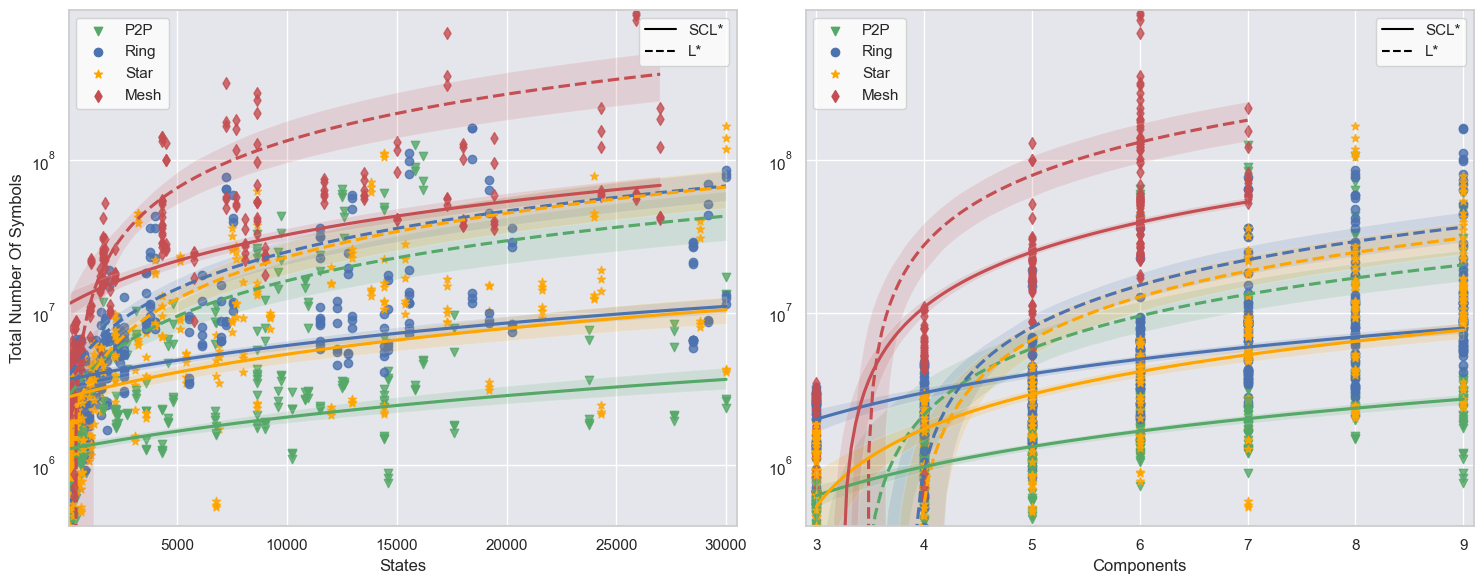

In [22]:
plotMergedInputSymbols(p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf, 'Generated Tests')

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plotMergedResets(p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf, testType):
    mergedTests = pd.concat([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf], ignore_index=True, sort=False)
    
    sns.set(style="whitegrid")  # Set Seaborn style
    
    # Create a 1x2 grid of subplots
    fig, axes = plt.subplots(ncols=2)
    
    # Scatter plots for LSTAR_TOTAL_RST
    for df, marker, color in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
                                 ["v", "o", "*", "d"], ["g", "b", "Orange", "r"]):
        sns.regplot(data=df, x='STATES', y='LSTAR_TOTAL_RST', marker=marker, color=color,
                    ax=axes[0], line_kws={'linestyle': '--'})
    
    # Scatter plots for CLSTAR_TOTAL_RST
    for df, marker, color, label in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
                                        ["v", "o", "*", "d"], ["g", "b", "Orange", "r"],
                                        ["P2P", "Ring", "Star", "Mesh"]):
        sns.regplot(data=df, x='STATES', y='CLSTAR_TOTAL_RST', marker=marker, color=color,
                    ax=axes[0], label=label)
        
    axes[0].set_xlabel('States')
    axes[0].set_xlim([50, 30500])
    axes[0].set_ylim(bottom=1000)
    axes[0].set_yscale('log')
    axes[0].set_ylabel('Total Number Of Resets')
    axes[0].legend(loc='upper left', prop={"size": 20})
    axes[0].set_facecolor("#e4e6eb")
    axes[0].set_axisbelow(True)
    axes[0].yaxis.grid(color='white')
    axes[0].xaxis.grid(color='white')
    
    typeLegend = [
        plt.scatter([], [], marker='v', color='g', label='P2P'),
        plt.scatter([], [], marker='o', color='b', label='Ring'),
        plt.scatter([], [], marker='*', color='Orange', label='Star'),
        plt.scatter([], [], marker='d', color='r', label='Mesh')
    ]
    methodLegend = [
        plt.Line2D([], [], color='Black', label='SCL*'),
        plt.Line2D([], [], color='Black', label='L*', linestyle='--')
    ]
    
    type_legend = axes[0].legend(handles=typeLegend, loc='upper left')
    method_legend = axes[0].legend(handles=methodLegend, loc='upper right')
    
    axes[0].add_artist(type_legend)
    
    # Scatter plots for LSTAR_TOTAL_RST vs. CLSTAR_COMPONENTS
    for df, marker, color in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
                                 ["v", "o", "*", "d"], ["g", "b", "Orange", "r"]):
        sns.regplot(data=df, x='CLSTAR_COMPONENTS', y='LSTAR_TOTAL_RST', marker=marker, color=color,
                    ax=axes[1], line_kws={'linestyle': '--'})
    
    # Scatter plots for CLSTAR_TOTAL_RST vs. CLSTAR_COMPONENTS
    for df, marker, color, label in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
                                        ["v", "o", "*", "d"], ["g", "b", "Orange", "r"],
                                        ["P2P", "Ring", "Star", "Mesh"]):
        sns.regplot(data=df, x='CLSTAR_COMPONENTS', y='CLSTAR_TOTAL_RST', marker=marker, color=color,
                    ax=axes[1], label=label)

    axes[1].set_xlabel('Components')
    axes[1].set_xlim([2.9, 9.1])
    axes[1].set_ylim(bottom=1000)
    axes[1].set_yscale('log')
    axes[1].set_facecolor("#e4e6eb")
    axes[1].set_axisbelow(True)
    axes[1].yaxis.grid(color='white')
    axes[1].xaxis.grid(color='white')
    axes[1].set_ylabel('')

    # Create individual legends for typeLegend and methodLegend
    type_legend = axes[1].legend(handles=typeLegend, loc='upper left')
    method_legend = axes[1].legend(handles=methodLegend, loc='upper right')

    # Add the legends back to the axes to ensure they both show up
    axes[1].add_artist(type_legend)
    
    plt.tight_layout()  # Adjust subplot spacing
    plt.show()


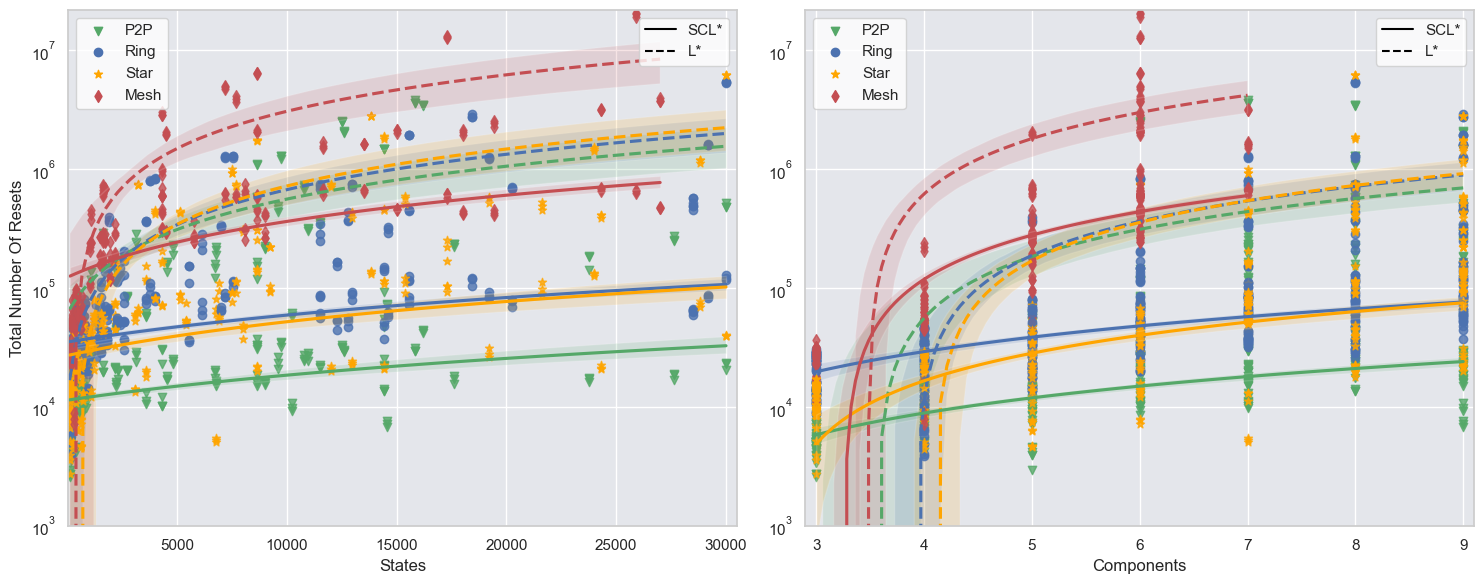

In [24]:
plotMergedResets(p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf, 'Generated Tests')

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotMergedResets(p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf, testType):
    mergedTests = pd.concat([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf], ignore_index=True, sort=False)
    
    sns.set(style="whitegrid")  # Set Seaborn style
    
    # Create a 1x2 grid of subplots
    fig, axes = plt.subplots(ncols=2, figsize=(18, 9))
    , 'CLSTAR_TOTAL_RST'
    # Scatter plots for LSTAR_TOTAL_RST
    for df, marker, color, label in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
                                        ["o", "x", "*", "s"], ["r", "r", "r", "r"],
                                        ["L*-P2P", "L*-Ring", "L*-Star", "L*-Mesh"]):
        sns.regplot(data=df, x='STATES', y='LSTAR_TOTAL_RST', marker=marker, color=color, ax=axes[0], label=label)
    
    # Scatter plots for CLSTAR_TOTAL_RST
    for df, marker, color, label in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
                                        ["o", "x", "*", "s"], ["g", "g", "g", "g"],
                                        ["SCL*-P2P", "SCL*-Ring", "SCL*-Star", "SCL*-Mesh"]):
        sns.regplot(data=df, x='STATES', y='CLSTAR_TOTAL_RST', marker=marker, color=color, ax=axes[0], label=label)
        
    
    axes[0].set_xlabel('States')
    axes[0].set_xlim([50, 4050])
    axes[0].set_yscale('log')
    
    # Scatter plots for LSTAR_TOTAL_RST vs. CLSTAR_COMPONENTS
    for df, marker, color, label in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
                                        ["o", "x", "*", "s"], ["r", "r", "r", "r"],
                                        ["L*-P2P", "L*-Ring", "L*-Star", "L*-Mesh"]):
        sns.regplot(data=df, x='CLSTAR_COMPONENTS', y='LSTAR_TOTAL_RST', marker=marker, color=color, ax=axes[1], label=label)
    
    # Scatter plots for CLSTAR_TOTAL_RST vs. CLSTAR_COMPONENTS
    for df, marker, color, label in zip([p2pTestsDf, ringTestsDf, starTestsDf, meshTestsDf],
                                        ["o", "x", "*", "s"], ["g", "g", "g", "g"],
                                        ["SCL*-P2P", "SCL*-Ring", "SCL*-Star", "SCL*-Mesh"]):
        sns.regplot(data=df, x='CLSTAR_COMPONENTS', y='CLSTAR_TOTAL_RST', marker=marker, color=color, ax=axes[1], label=label)
        
    axes[0].legend(ncol=2)
    axes[1].legend()
    
    axes[1].set_xlabel('Components')
    axes[1].set_xlim([1.9, 9.1])
    axes[1].set_yscale('log')

    
    plt.yscale('log')
    plt.tight_layout()  # Adjust subplot spacing
    plt.show()


In [26]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
def plotEqs(data, testType):
    d2 = data[['STATES','CLSTAR_COMPONENTS', 'LSTAR_EQs', 'CLSTAR_EQs']]

    d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']] 
    d2 = d2.set_index(['#states','#components'])

    d2 = d2[['L*',  'SCL*']].stack().reset_index()
    d2 = d2.rename(columns={"level_2": "method", 0: "total number of Equivanlence Queries"})

    g = sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of Equivanlence Queries"],
                hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g']);
    g.fig.suptitle(testType, y=1.08)
    plt.yscale('log')

C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\680782416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\680782416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\680782416.py:5: 

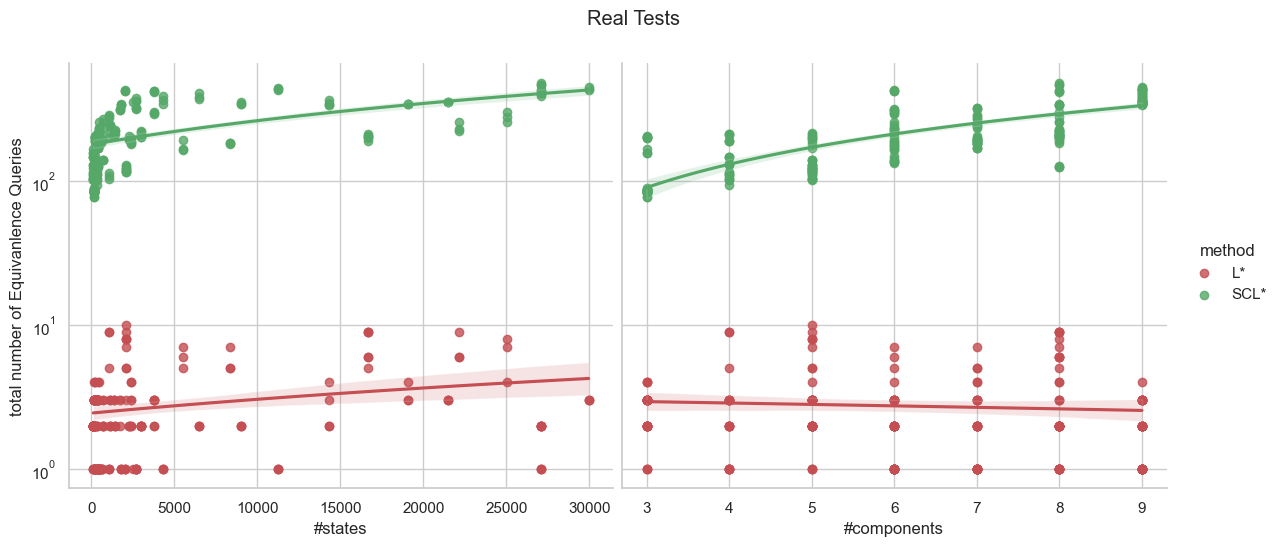

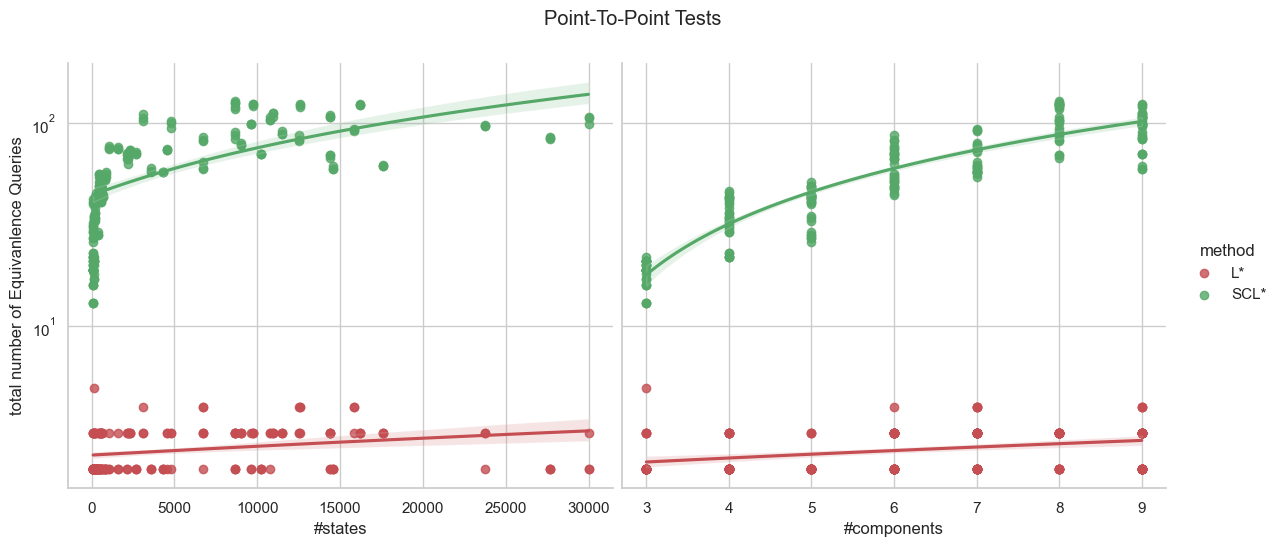

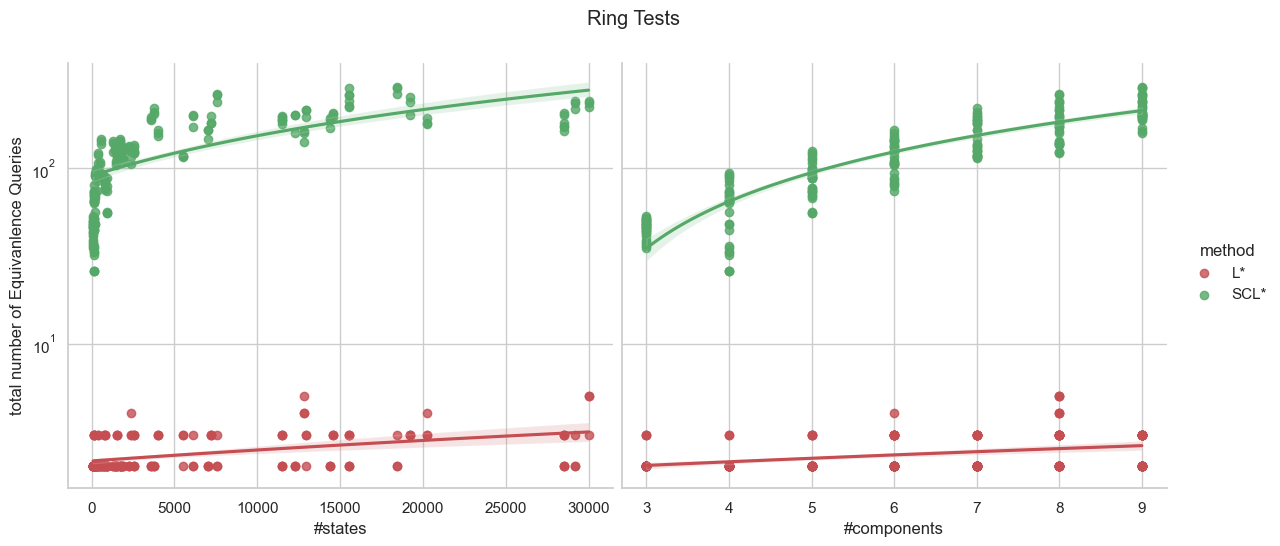

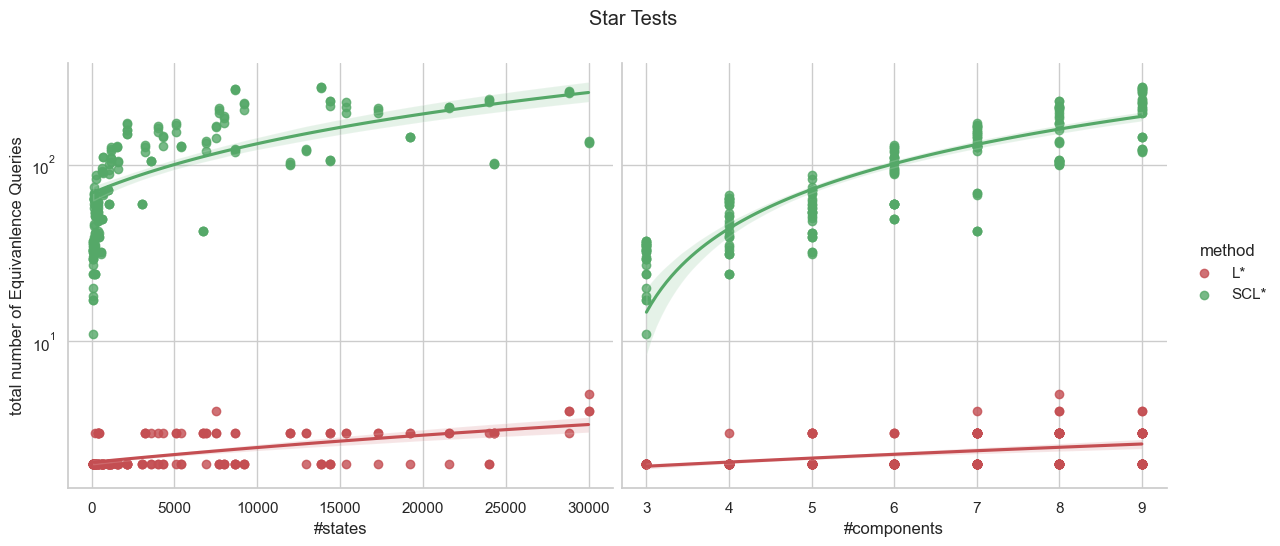

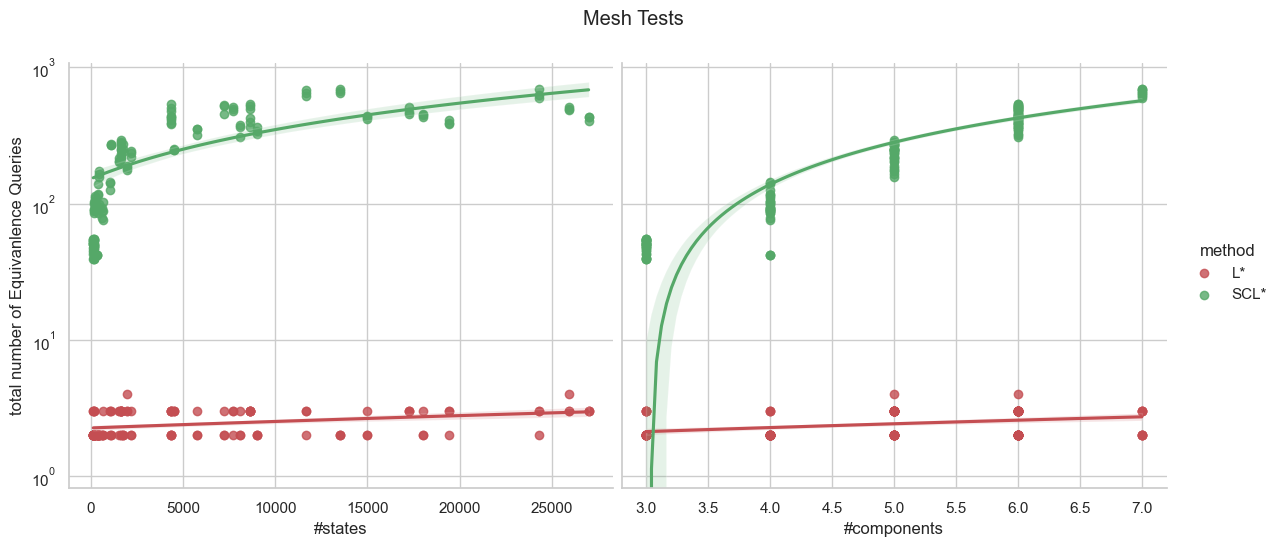

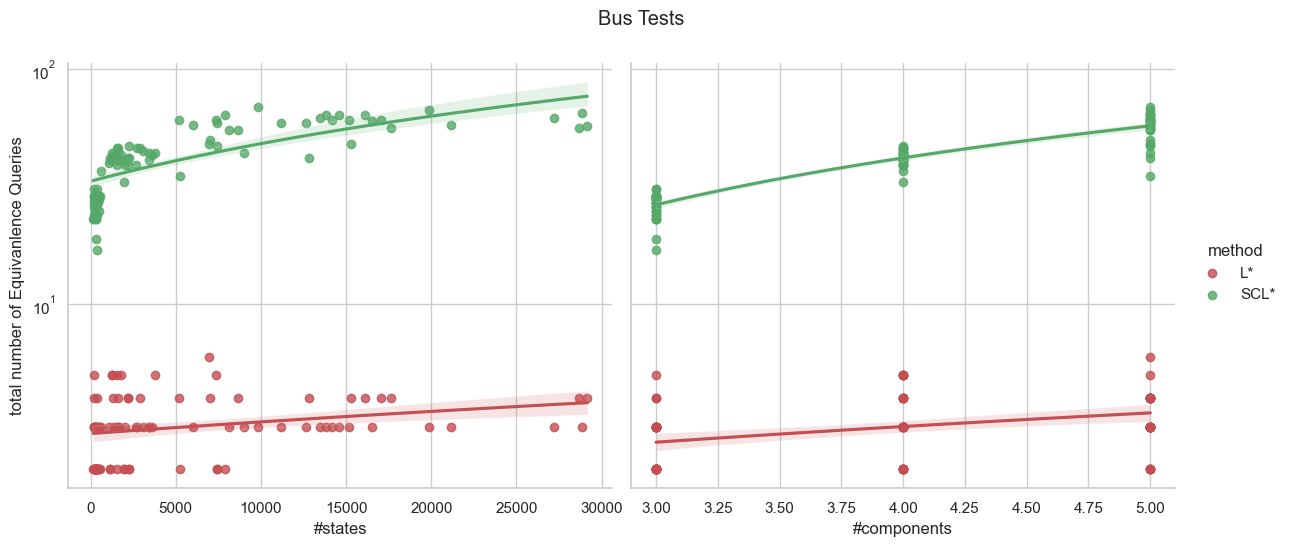

In [27]:
plotEqs(realTestsDf, 'Real Tests')
plotEqs(p2pTestsDf, 'Point-To-Point Tests')
plotEqs(ringTestsDf, 'Ring Tests')
plotEqs(starTestsDf, 'Star Tests')
plotEqs(meshTestsDf, 'Mesh Tests')
plotEqs(busTestsDf, 'Bus Tests')

In [28]:
def plotMqs(data, testType):
    d2 = data[['STATES','CLSTAR_COMPONENTS', 'LSTAR_MQs', 'CLSTAR_MQs']]

    d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_MQs', 'CLSTAR_MQs', 'CLSTAR_COMPONENTS', 'STATES']] 
    d2 = d2.set_index(['#states','#components'])

    d2 = d2[['L*',  'SCL*']].stack().reset_index()
    d2 = d2.rename(columns={"level_2": "method", 0: "total number of Membership Queries"})

    g = sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of Membership Queries"],
                hue="method", height=5, aspect=1.2, kind="reg", palette=['r', 'g']);
    g.fig.suptitle(testType, y=1.08)
    plt.yscale('log')

C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\277059711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_MQs', 'CLSTAR_MQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\277059711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_MQs', 'CLSTAR_MQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_16200\277059711.py:4: 

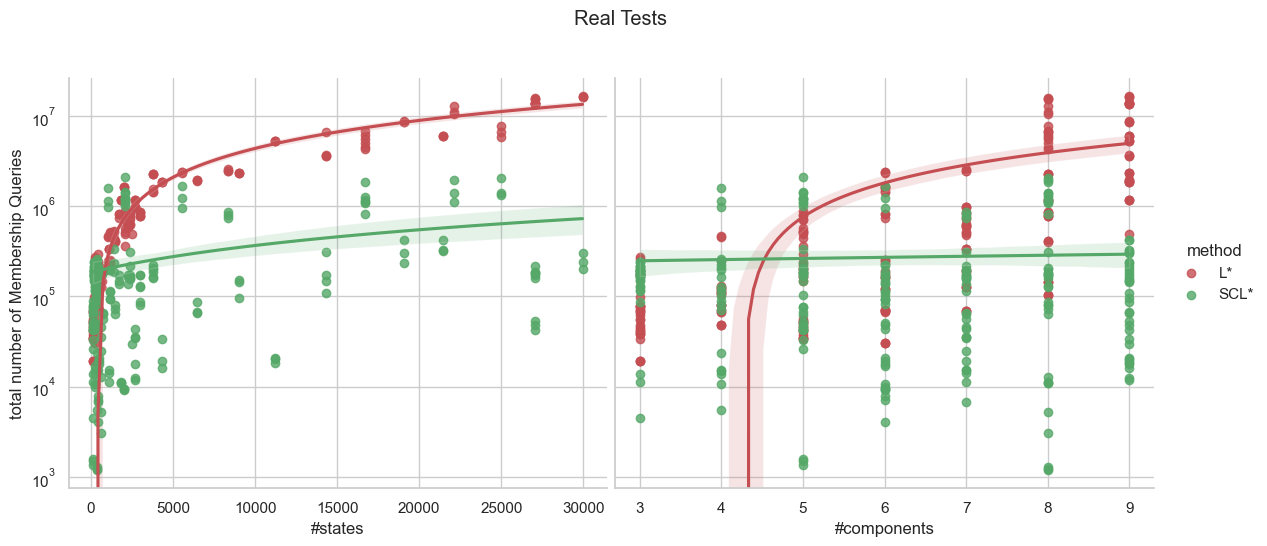

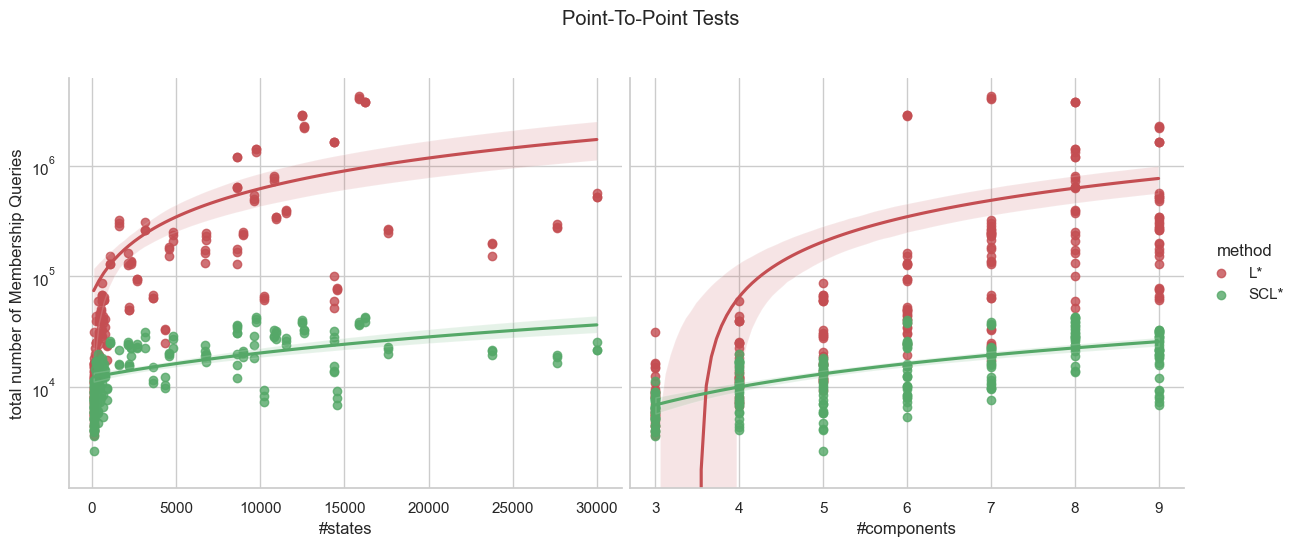

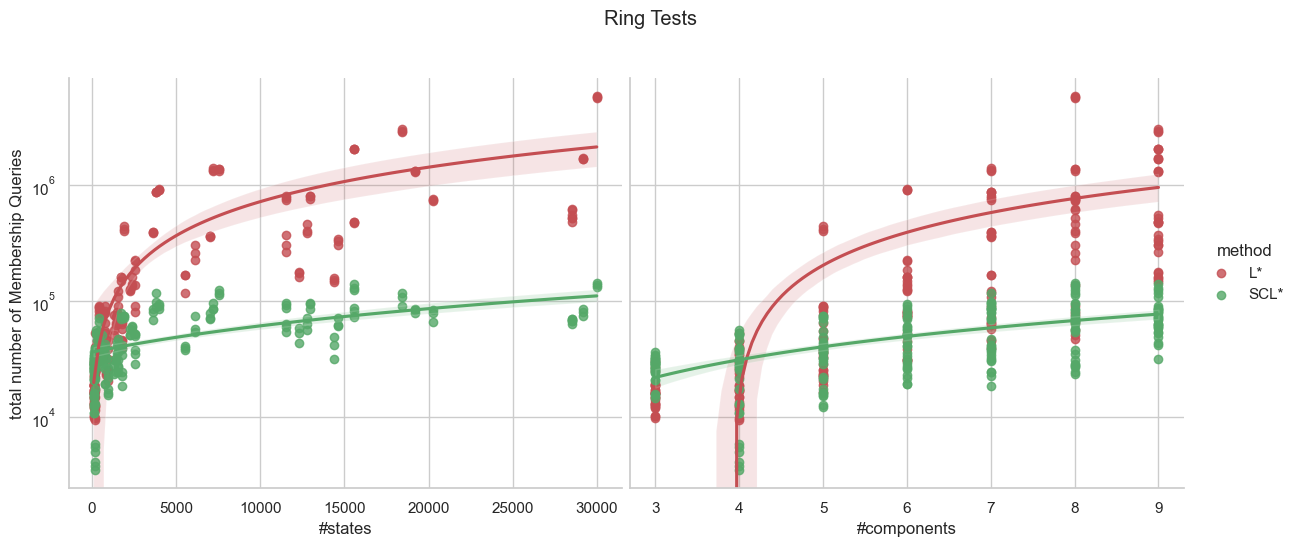

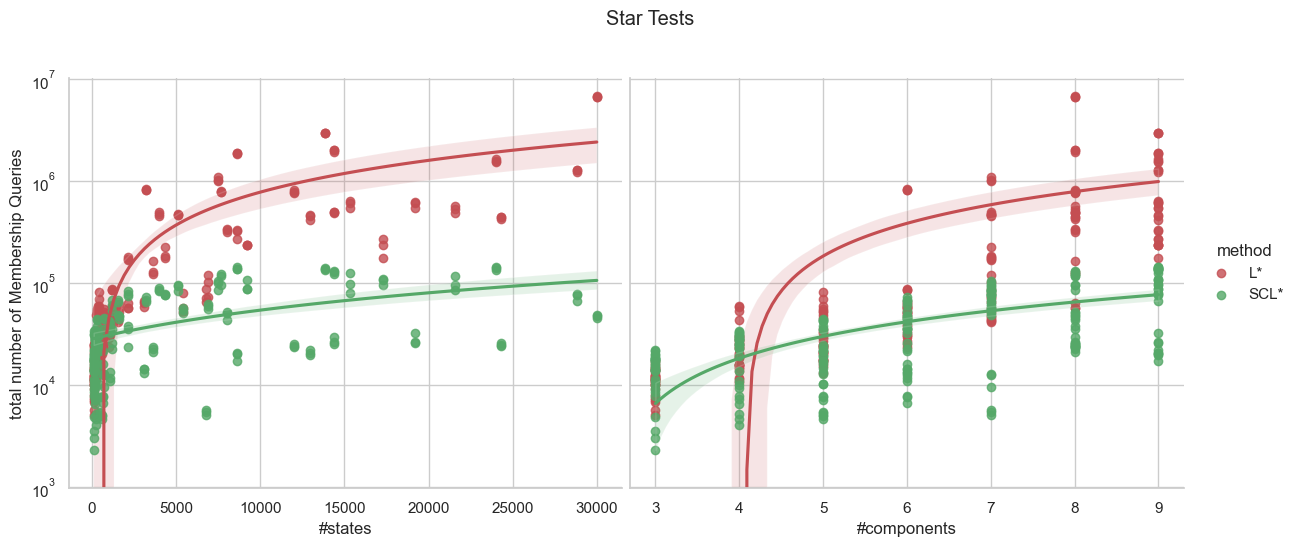

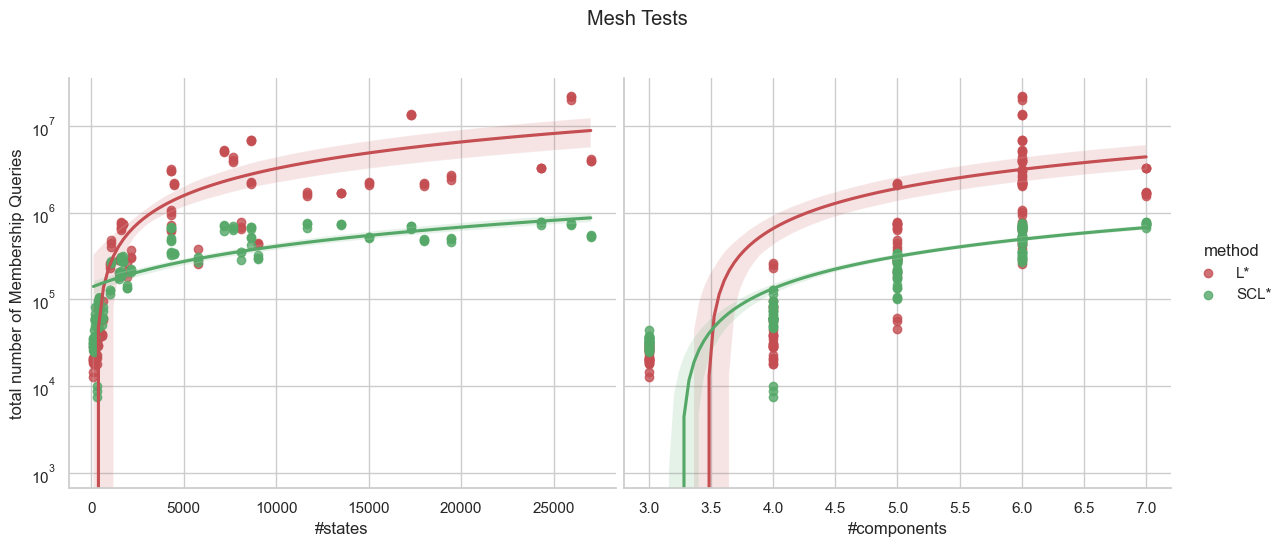

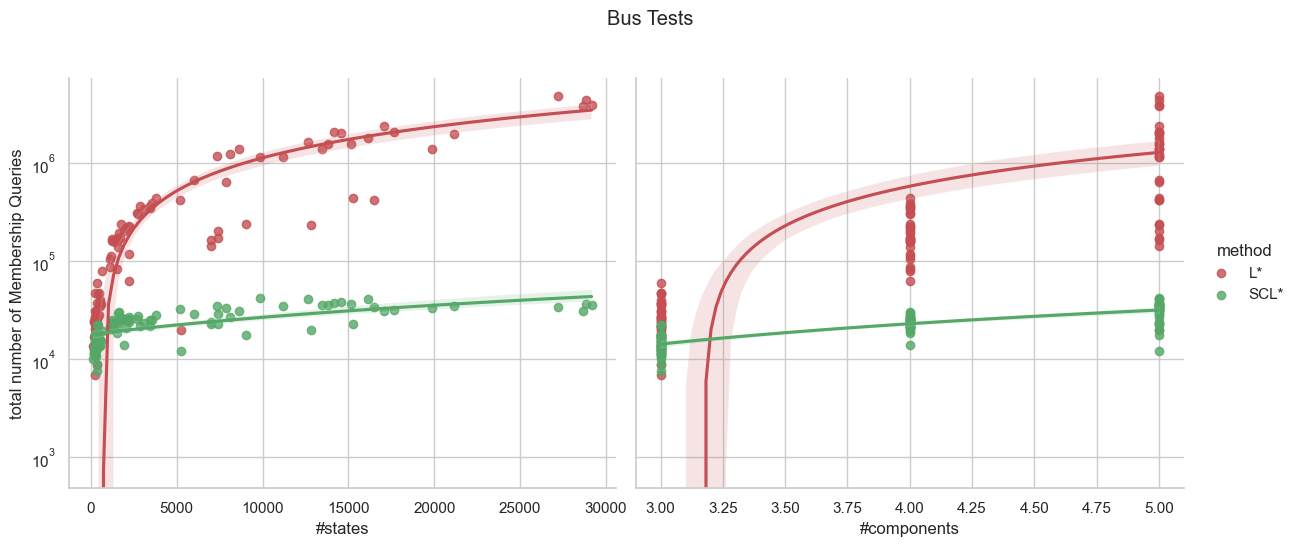

In [29]:
plotMqs(realTestsDf, 'Real Tests')
plotMqs(p2pTestsDf, 'Point-To-Point Tests')
plotMqs(ringTestsDf, 'Ring Tests')
plotMqs(starTestsDf, 'Star Tests')
plotMqs(meshTestsDf, 'Mesh Tests')
plotMqs(busTestsDf, 'Bus Tests')